In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import *

# load Data
ResultPath = '../50_Figure_Data/'

File=ResultPath+'SI1_CF_ITP_Sensitivity.xlsx'

DF = pd.read_excel(File, sheet_name='CF',skiprows=1).set_index('Scenario')

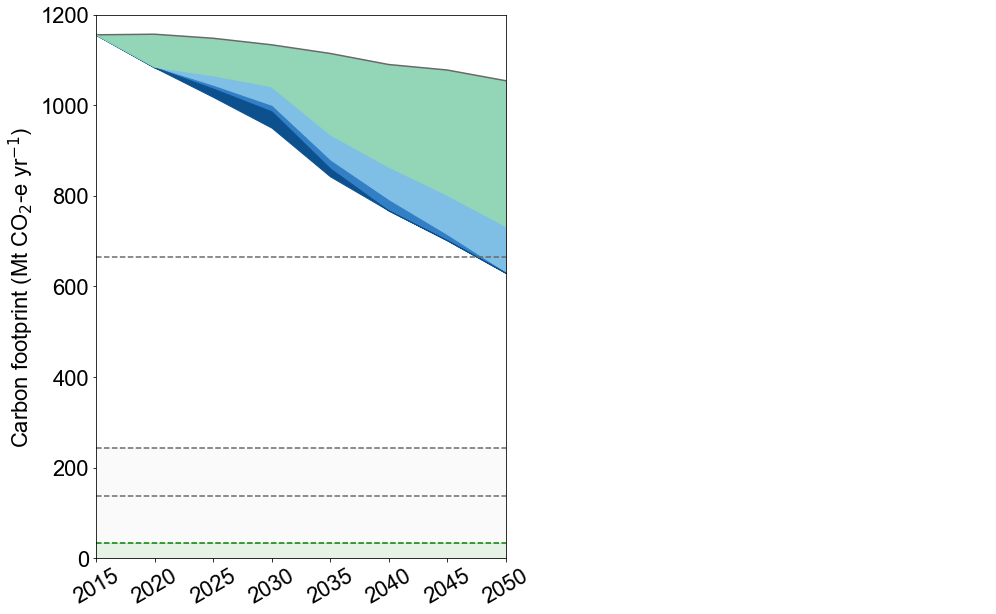

In [3]:
### Devide ITP effect only
%matplotlib inline
# set plot area
fig_high = 10
fig_width = 16
fig, axes= plt.subplots(1,2,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1,1],height_ratios=[1],
                                                wspace=0.18, hspace=0.30)) 
ax0 = axes[0]
ax1 = axes[1]

plt.rcParams['font.family'] = 'Arial'

#set initial
fontsize = 26
labelsize = 22

#set color
C_BaU = 'dimgrey'
C_RE = '#92d6b7'
C_ITP_2050 = '#7fbee5'
C_ITP_2040 = '#327fc6'
C_ITP_2030 = '#0c508e'
C_MFT_T2 = '#ffbfcc'
C_MFT_T3 = '#ff80a4'
C_MFT_T4 = '#dd335f'

## GHG Target
Target2030 = 0.665*1000 #MtCO2
Target2050 = 0.033*1000 #MtCO2
Target2050_CCS_min = Target2050 + 0.105*1000 #MtCO2
Target2050_CCS_max = Target2050 + 0.210*1000 #MtCO2
# Target line
ax0.hlines(Target2030,2015,2050,color='dimgrey',linestyle='--')
ax0.hlines(Target2050_CCS_min,2015,2050,color='dimgrey',linestyle='--')
ax0.hlines(Target2050_CCS_max,2015,2050,color='dimgrey',linestyle='--')
ax0.hlines(Target2050,2015,2050,color='green',linestyle='--')
# Fill
x_fill = [2015,2020,2025,2030,2035,2040,2045,2050]
ax0.fill_between(x_fill, Target2050, Target2050_CCS_max, color='lightgrey', alpha=0.1)
ax0.fill_between(x_fill, Target2050, color='green', alpha=0.1)

### plot CF
x = DF.columns
y_BaU = DF.iloc[0,:]
y_BaU_RE = DF.iloc[1,:]
y_BaU_RE_ITP2050 = DF.iloc[2,:]
y_BaU_RE_ITP2040 = DF.iloc[3,:]
y_BaU_RE_ITP2030 = DF.iloc[4,:]
y_MFT2_RE_ITP2030 = DF.iloc[5,:]
y_MFT3_RE_ITP2030 = DF.iloc[6,:]
y_MFT4_RE_ITP2030 = DF.iloc[7,:]
    
#ITP Scenario
ax0.fill_between(x_fill, y_BaU_RE, y_BaU, color=C_RE, alpha=1)
ax0.fill_between(x_fill, y_BaU_RE_ITP2050, y_BaU_RE, color=C_ITP_2050, alpha=1)
ax0.fill_between(x_fill, y_BaU_RE_ITP2040, y_BaU_RE_ITP2050, color=C_ITP_2040, alpha=1)
ax0.fill_between(x_fill, y_BaU_RE_ITP2030, y_BaU_RE_ITP2040, color=C_ITP_2030, alpha=1)


lw = 2.0
mew = 2.0
# BaU
ax0.plot(x,y_BaU,color=C_BaU,linestyle='-')
# BaU+RE
ax0.plot(x,y_BaU_RE,color=C_RE,linestyle='-')

#BaU+RE+ITP
#ax.plot(x,y_BaU_RE_ITP2050,color=C_ITP_2050,linestyle='-')
#ax.plot(x,y_BaU_RE_ITP2040,color=C_ITP_2040,linestyle='-')
#ax0.plot(x,y_BaU_RE_ITP2030,color=C_ITP_2030,linestyle='-')



# set figure elements
ax0.set_xlim(2015,2050)
ax0.set_ylim(0,1200)
ax0.tick_params(labelsize=labelsize)
ax0.set_xticks([2015,2020,2025,2030,2035,2040,2045,2050])
ax0.set_xticklabels([2015,2020,2025,2030,2035,2040,2045,2050],rotation=30)
    
ax0.set_ylabel('Carbon footprint (Mt CO$_2$-e yr$^{-1}$)', size=labelsize)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_yticks([])
ax1.set_xticks([])


# Save figure
fig.savefig("../50_Figure_Data/SI1_CF_ITP.svg",
             format="svg", bbox_inches="tight", facecolor='white')